In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [2]:
##This project is related to Overfitting and Underfitting
#For the solution in overfitting, it is dropout and regularization of weights
#Transform this sentence into multi-hot encoding for quickly diving into the overfitting.

NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Make an matric - (len(sequences), dimension) - filled with 0
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17473536/17464789 [==============================] - 0s 0us/step


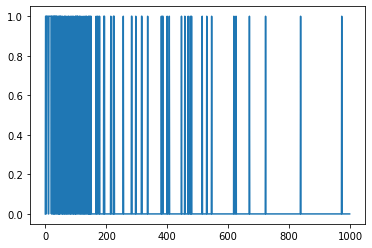

In [3]:
plt.plot(train_data[0])

In [4]:
##The best solution about Overfitting is to minimize the size of a model
#By decreasing the number of parameters learnable in models.
#Should be balanced between the too much capabilities and not so enough capabilities
#For finding the best network, Need to many trials and errors.
#Make a baseline model for comparing smaller and bigger model
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.callbacks import EarlyStopping, TensorBoard
early_stopping = EarlyStopping(monitor="loss", patience=20, mode="min")
tb_hist = TensorBoard(
    log_dir='graph', histogram_freq=0, write_graph=True, write_images=True
)

baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2,
                                      callbacks=[tb_hist, early_stopping])

Epoch 1/20
49/49 - 2s - loss: 0.5841 - accuracy: 0.6984 - binary_crossentropy: 0.5841 - val_loss: 0.4480 - val_accuracy: 0.8088 - val_binary_crossentropy: 0.4480 - 2s/epoch - 31ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3821 - accuracy: 0.8411 - binary_crossentropy: 0.3821 - val_loss: 0.3523 - val_accuracy: 0.8520 - val_binary_crossentropy: 0.3523 - 376ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3283 - accuracy: 0.8638 - binary_crossentropy: 0.3283 - val_loss: 0.3381 - val_accuracy: 0.8563 - val_binary_crossentropy: 0.3381 - 341ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3120 - accuracy: 0.8703 - binary_crossentropy: 0.3120 - val_loss: 0.3301 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3301 - 383ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3042 - accuracy: 0.8751 - binary_crossentropy: 0.3042 - val_loss: 0.3292 - val_accuracy: 0.8612 - val_binary_crossentropy: 0.3292 - 348ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2992 - accuracy: 0.8766 - binary_cr

In [6]:
# %load_ext tensorboard
# %tensorboard --logdir {"/content/graph"}

In [7]:
##For comparsion from baseline to smaller to bigger
#Make a smaller model

smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 4004      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.callbacks import EarlyStopping, TensorBoard
early_stopping = EarlyStopping(monitor="loss", patience=20, mode="min")
tb_hist = TensorBoard(
    log_dir='graph', histogram_freq=0, write_graph=True, write_images=True
)

smaller_history = smaller_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2,
                                      callbacks=[tb_hist, early_stopping])

Epoch 1/20
49/49 - 1s - loss: 0.6707 - accuracy: 0.5716 - binary_crossentropy: 0.6707 - val_loss: 0.6253 - val_accuracy: 0.6750 - val_binary_crossentropy: 0.6253 - 1s/epoch - 21ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5469 - accuracy: 0.7715 - binary_crossentropy: 0.5469 - val_loss: 0.4656 - val_accuracy: 0.8228 - val_binary_crossentropy: 0.4656 - 312ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4058 - accuracy: 0.8432 - binary_crossentropy: 0.4058 - val_loss: 0.3775 - val_accuracy: 0.8466 - val_binary_crossentropy: 0.3775 - 366ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3484 - accuracy: 0.8604 - binary_crossentropy: 0.3484 - val_loss: 0.3538 - val_accuracy: 0.8521 - val_binary_crossentropy: 0.3538 - 318ms/epoch - 6ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3259 - accuracy: 0.8685 - binary_crossentropy: 0.3259 - val_loss: 0.3377 - val_accuracy: 0.8587 - val_binary_crossentropy: 0.3377 - 302ms/epoch - 6ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3142 - accuracy: 0.8720 - binary_cr

In [9]:
##Making too much model for overfitting

bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               512512    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.callbacks import EarlyStopping, TensorBoard
early_stopping = EarlyStopping(monitor="loss", patience=20, mode="min")
tb_hist = TensorBoard(
    log_dir='graph', histogram_freq=0, write_graph=True, write_images=True
)

bigger_history = bigger_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2,
                                      callbacks=[tb_hist, early_stopping])

Epoch 1/20
49/49 - 3s - loss: 0.4139 - accuracy: 0.8091 - binary_crossentropy: 0.4139 - val_loss: 0.3419 - val_accuracy: 0.8533 - val_binary_crossentropy: 0.3419 - 3s/epoch - 68ms/step
Epoch 2/20
49/49 - 3s - loss: 0.2914 - accuracy: 0.8786 - binary_crossentropy: 0.2914 - val_loss: 0.3337 - val_accuracy: 0.8564 - val_binary_crossentropy: 0.3337 - 3s/epoch - 53ms/step
Epoch 3/20
49/49 - 3s - loss: 0.2255 - accuracy: 0.9107 - binary_crossentropy: 0.2255 - val_loss: 0.3375 - val_accuracy: 0.8558 - val_binary_crossentropy: 0.3375 - 3s/epoch - 54ms/step
Epoch 4/20
49/49 - 3s - loss: 0.1106 - accuracy: 0.9651 - binary_crossentropy: 0.1106 - val_loss: 0.4275 - val_accuracy: 0.8442 - val_binary_crossentropy: 0.4275 - 3s/epoch - 54ms/step
Epoch 5/20
49/49 - 3s - loss: 0.0312 - accuracy: 0.9943 - binary_crossentropy: 0.0312 - val_loss: 0.5189 - val_accuracy: 0.8507 - val_binary_crossentropy: 0.5189 - 3s/epoch - 53ms/step
Epoch 6/20
49/49 - 3s - loss: 0.0067 - accuracy: 0.9997 - binary_crossentro

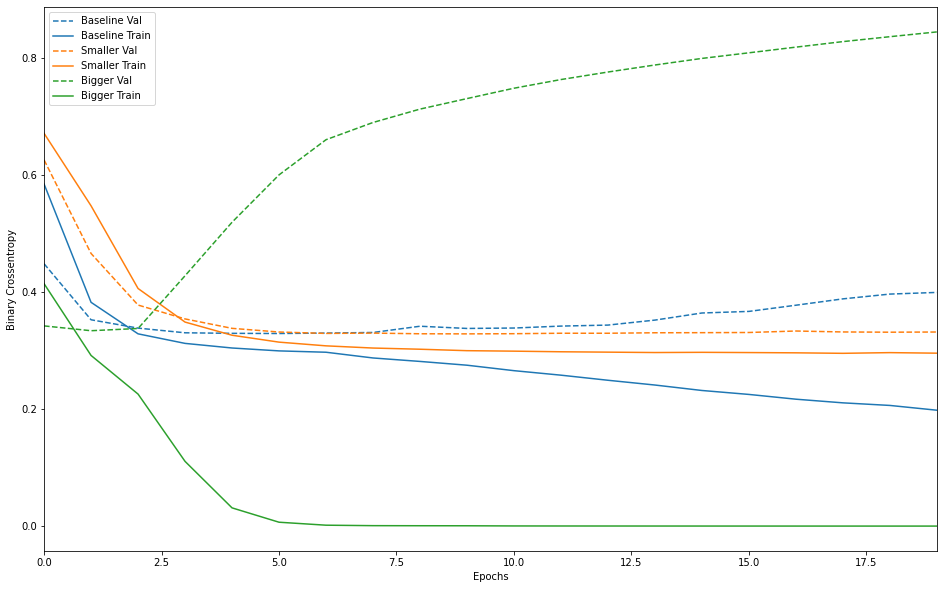

In [11]:
##Plot the graph as to train loss and validation loss

def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
                ('smaller', smaller_history),
                ('bigger', bigger_history)])
  

In [12]:
##Regularize weights
#For overfitting, simple model tends to be lower than any complicated model
#In this case, the simple model means model of a small entropy or small parameters
#Use the L2 Regularization known as weight decay
#-->L2 is to limit several parameters to be close to zero, but perfectly not to make to zero like L1 Regularization

l2_model = keras.models.Sequential([
      keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                         activation='relu',
                         input_shape=(NUM_WORDS,)),
      keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                         activation='relu') ,
      keras.layers.Dense(1, activation='sigmoid')
])
##L2(0.001) means that all the values of weight matrix in layers on total loss is
# adding by 0.001 * weight_coefficient_value**2
       
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2,
                                callbacks=[tb_hist, early_stopping])

Epoch 1/20
49/49 - 1s - loss: 0.6105 - accuracy: 0.7192 - binary_crossentropy: 0.5662 - val_loss: 0.4542 - val_accuracy: 0.8255 - val_binary_crossentropy: 0.4110 - 1s/epoch - 23ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3998 - accuracy: 0.8492 - binary_crossentropy: 0.3569 - val_loss: 0.3830 - val_accuracy: 0.8564 - val_binary_crossentropy: 0.3409 - 352ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3604 - accuracy: 0.8671 - binary_crossentropy: 0.3192 - val_loss: 0.3733 - val_accuracy: 0.8593 - val_binary_crossentropy: 0.3333 - 365ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3490 - accuracy: 0.8710 - binary_crossentropy: 0.3099 - val_loss: 0.3689 - val_accuracy: 0.8605 - val_binary_crossentropy: 0.3309 - 368ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3443 - accuracy: 0.8735 - binary_crossentropy: 0.3071 - val_loss: 0.3641 - val_accuracy: 0.8597 - val_binary_crossentropy: 0.3278 - 374ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3392 - accuracy: 0.8738 - binary_cr

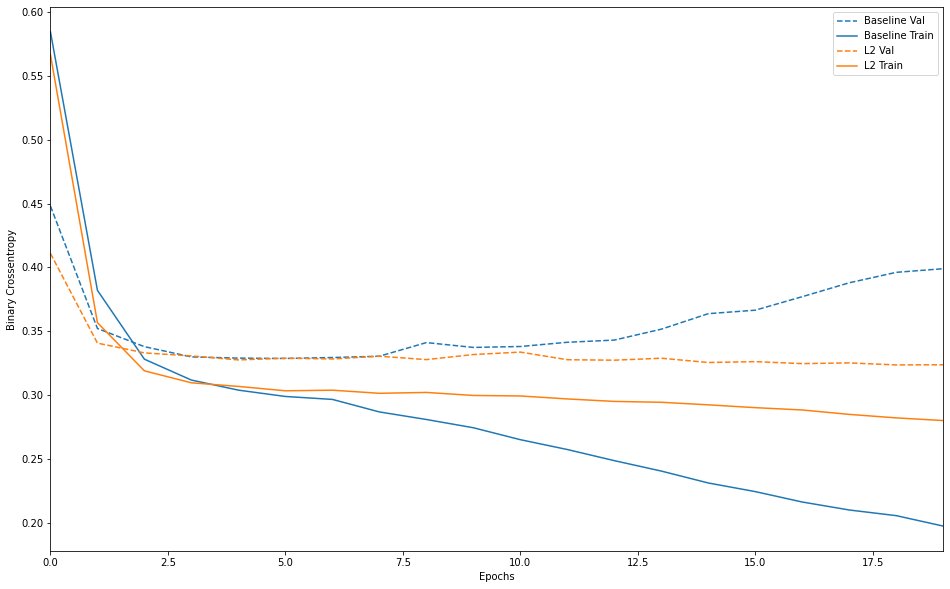

In [13]:
##Check the effect of L2 regularization

plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

##As shown results above, parameters of each model is the same; However,
#the model applied L2 regularization endured much better than the current model

In [21]:
##Append Dropout one of the affordable solution as to regularization
#While training, the layer mounted a dropout randomly turns off the output features of the layer(that is, make it zero)
#However, no units are dropped out during the test phase.
#Look over how much the overfitting is reduced by affixing two layers of Dropout

dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2,
                                callbacks=[tb_hist, early_stopping])

Epoch 1/20
49/49 - 2s - loss: 0.6751 - accuracy: 0.5768 - binary_crossentropy: 0.6751 - val_loss: 0.5979 - val_accuracy: 0.7424 - val_binary_crossentropy: 0.5979 - 2s/epoch - 36ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5664 - accuracy: 0.7096 - binary_crossentropy: 0.5664 - val_loss: 0.4502 - val_accuracy: 0.8293 - val_binary_crossentropy: 0.4502 - 425ms/epoch - 9ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4775 - accuracy: 0.7906 - binary_crossentropy: 0.4775 - val_loss: 0.3767 - val_accuracy: 0.8449 - val_binary_crossentropy: 0.3767 - 416ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4326 - accuracy: 0.8242 - binary_crossentropy: 0.4326 - val_loss: 0.3518 - val_accuracy: 0.8543 - val_binary_crossentropy: 0.3518 - 436ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4042 - accuracy: 0.8337 - binary_crossentropy: 0.4042 - val_loss: 0.3363 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3363 - 455ms/epoch - 9ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3870 - accuracy: 0.8446 - binary_cr

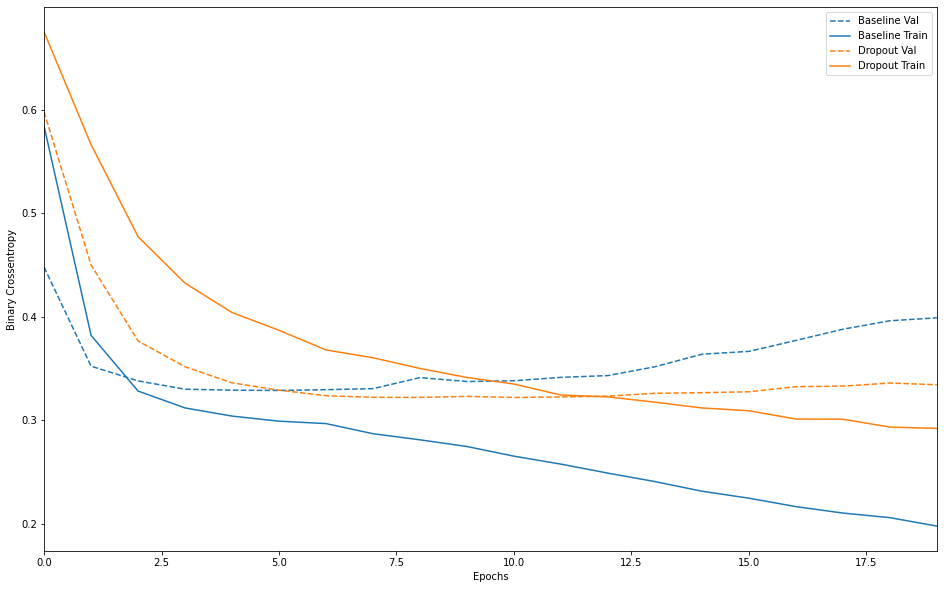

In [22]:
##As the results shown above, after affixing dropouts in layers, 
#the applied model definitely ameliorated more than before

plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])



In [ ]:
##In summary, for preventing from overfitting during the train phase, 
#The most effective way is to follow as:
  #1. Correct train datas more
  #2. Reduce the capability of network
  #3. Accumulate weight regularization
  #4. Append Dropout